# Targeting Evaluations

In [1]:
import sys
sys.path.insert(0,'../..')
from targeting import *

Set up the configuration file and load some targeting simulation data.


In [22]:
targeting = Targeting('../../configs/config_emily.yml')

Create a table that compares targeting methods to a ground truth poverty measure. Three threshold-agnostic targeting metrics will be calculated: Pearson correlation (between ground truth and proxies), Spearman correlation, and a threshold-agnostic Area Under the Reciever Operating Characteristic Curve Score (AUC). Additionally, provide percentile targeting thresholds for ground truth and proxy to obtain four threshold-specific targeting metrics: accuracy, precision, recall, and threshold-specific AUC. As with all calculations in this module, the table can be calculated with or without sample weights.

In [24]:
targeting.targeting_table('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], 50, 20)

,Targeting Method,Pearson,Spearman,AUC (Threshold-Agnostic),Accuracy,Precision,Recall,AUC (Threshold-Specific)
0,proxy1,0.853370,0.856880,0.882319,0.700,1.000,0.400,0.925204
1,proxy2,0.816323,0.818275,0.869501,0.698,0.995,0.398,0.921336
2,proxy3,0.775243,0.772671,0.846071,0.688,0.970,0.388,0.886284
3,proxy4,0.731196,0.724984,0.817799,0.680,0.950,0.380,0.866024


Draw threshold-agnostic receiver operatoring characteristic (ROC) curves and precision-recall curves. Threshold-agnostic ROC curves are drawn by taking a grid matched targeting thresholds (that is, targeting K% of the population according to a proxy and the same K% of the population according to the ground-truth, for a krid of K between 0 and 100), and calculating the false positive rate and true positive rate of the targeting method for each point in the grid. Threshold-agnostic precision-reccall curves are calculated in the same way, so precision and recall are balanced by construction.

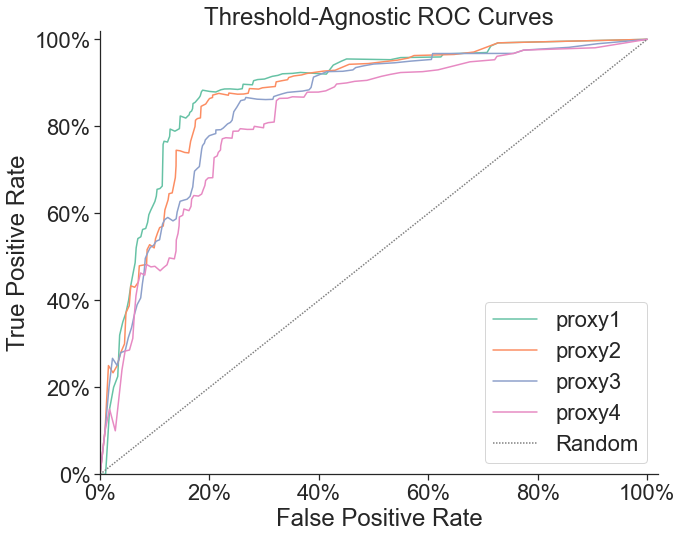

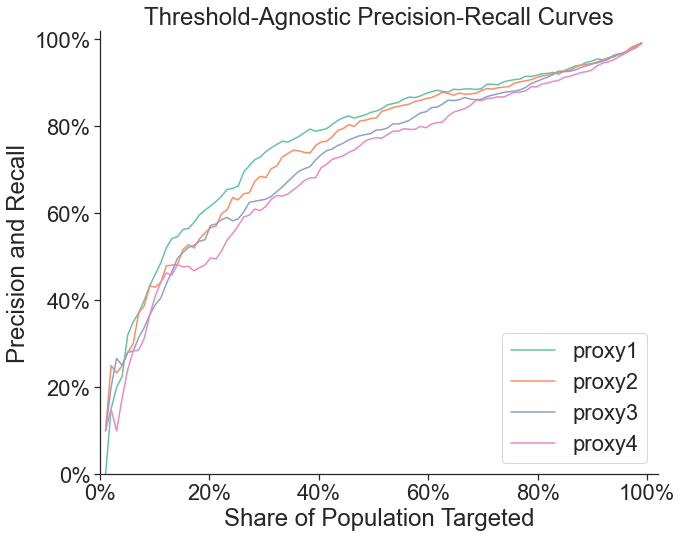

In [27]:
targeting.roc_curves('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], p=None, weighted=False)
targeting.precision_recall_curves('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], p=None, weighted=False)

Draw threshold-specific ROC curves and precision-recall curves. Threshold-specific ROC curves are calculated by holding the share of the population targeted according to the ground-truth measure constant, and varying the share of the population targeted on the proxy measure to obtain false positive and true positive rate trade-offs. 

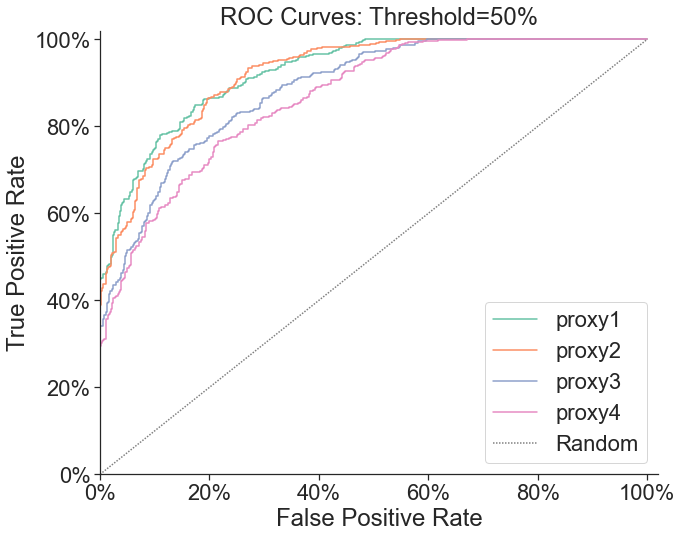

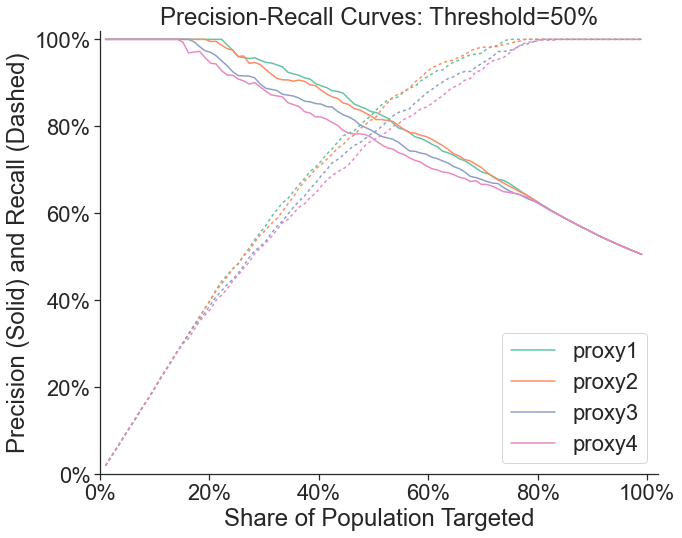

In [28]:
targeting.roc_curves('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], p=50, weighted=False)
targeting.precision_recall_curves('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], p=50, weighted=False)

Provide a budget (provided as the level of benefits assigned to each individual UBI program, in the same units as the ground truth poverty measure) to draw social welfare curves for a set of targeting methods. Individual welfare is assumed to be a convex function of pre-program poverty and benefits assigned. Generate a table with the share of population targeted and corresponding transfer size that optimizes social welfare for each proxy poverty measure that could be used for targeting.

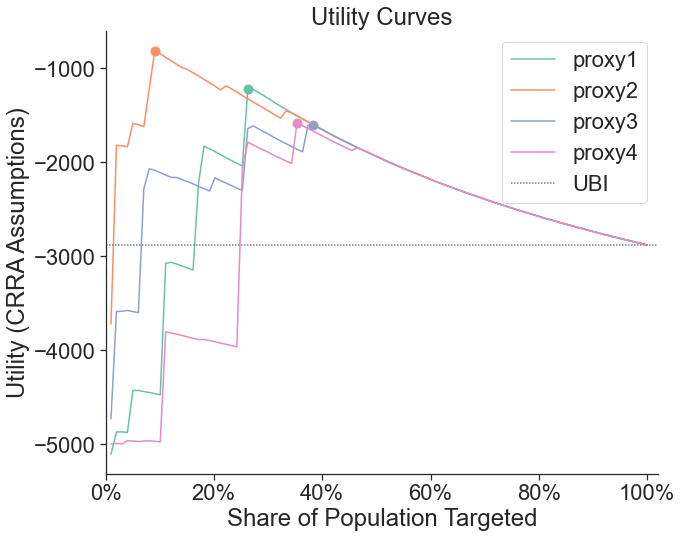

,Proxy,Optimal Share of Population Targeted,Maximum Utility,Optimal Transfer Size
0,proxy1,26.255102,-1225.954439,0.038168
1,proxy2,9.081633,-817.080667,0.111111
2,proxy3,38.377551,-1606.065329,0.026110
3,proxy4,35.346939,-1582.812099,0.028329


In [30]:
targeting.utility_curves('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], .01, weighted=False)
targeting.utility_table('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], .01, weighted=False)